In [25]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Analyse RBS data from Reis et al. 2020

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import re
from common import count_ARN_motifs, count_AAN_motifs, count_ARNn


top_dir = os.path.join('data', '22_analyse_RBS_data_Reis')
fn = os.path.join('data', 'sb0c00394_si_002.xlsx')
name_sheets = ['RBS Calculator v1.1', 'RBS Calculator v2.0', 'RBS Calculator v2.1']

In [ ]:
excel_file = pd.ExcelFile(fn)
df = excel_file.parse(name_sheets[-1], index_col=0)
df_aux = excel_file.parse(name_sheets[1], index_col=0)
df['used_mRNA_sequence'] = df_aux['used_mRNA_sequence']
df['predicted_5pUTR_2.0'] = df_aux['predicted_5pUTR']
df['predicted_CDS_2.0'] = df_aux['predicted_CDS']
df['TIR'] = df_aux['TIR']
# del df_aux

df = df[df['used_mRNA_sequence'].apply(lambda x: type(x) == str)]
df = df[df['predicted_5pUTR_2.0'].apply(lambda x: type(x) == str)]

# df['ARN count'] = df['used_mRNA_sequence'].apply(count_ARN_motifs)
# df['AAN count'] = df['used_mRNA_sequence'].apply(count_AAN_motifs)
df["ARN count (5' UTR)"] = df['predicted_UTR'].apply(count_ARN_motifs)
df["AAN count (5' UTR)"] = df['predicted_UTR'].apply(count_AAN_motifs)
df["ARNn count (5' UTR)"] = df['predicted_UTR'].apply(count_ARNn)


print("\nShape of dataframe:", df.shape)


Shape of dataframe: (984, 43)


# ARN motifs vs. predicted DG

<Axes: xlabel="ARNn count (5' UTR)", ylabel='dG_total'>

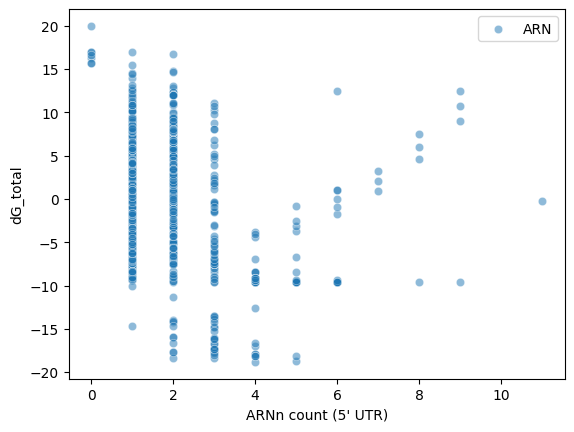

In [28]:
sns.scatterplot(data=df, x="ARNn count (5' UTR)", y='dG_total', label='ARN', alpha=0.5)
# sns.scatterplot(data=df, x="AAN count (5' UTR)", y='dG_total', label='AAN', alpha=0.5)

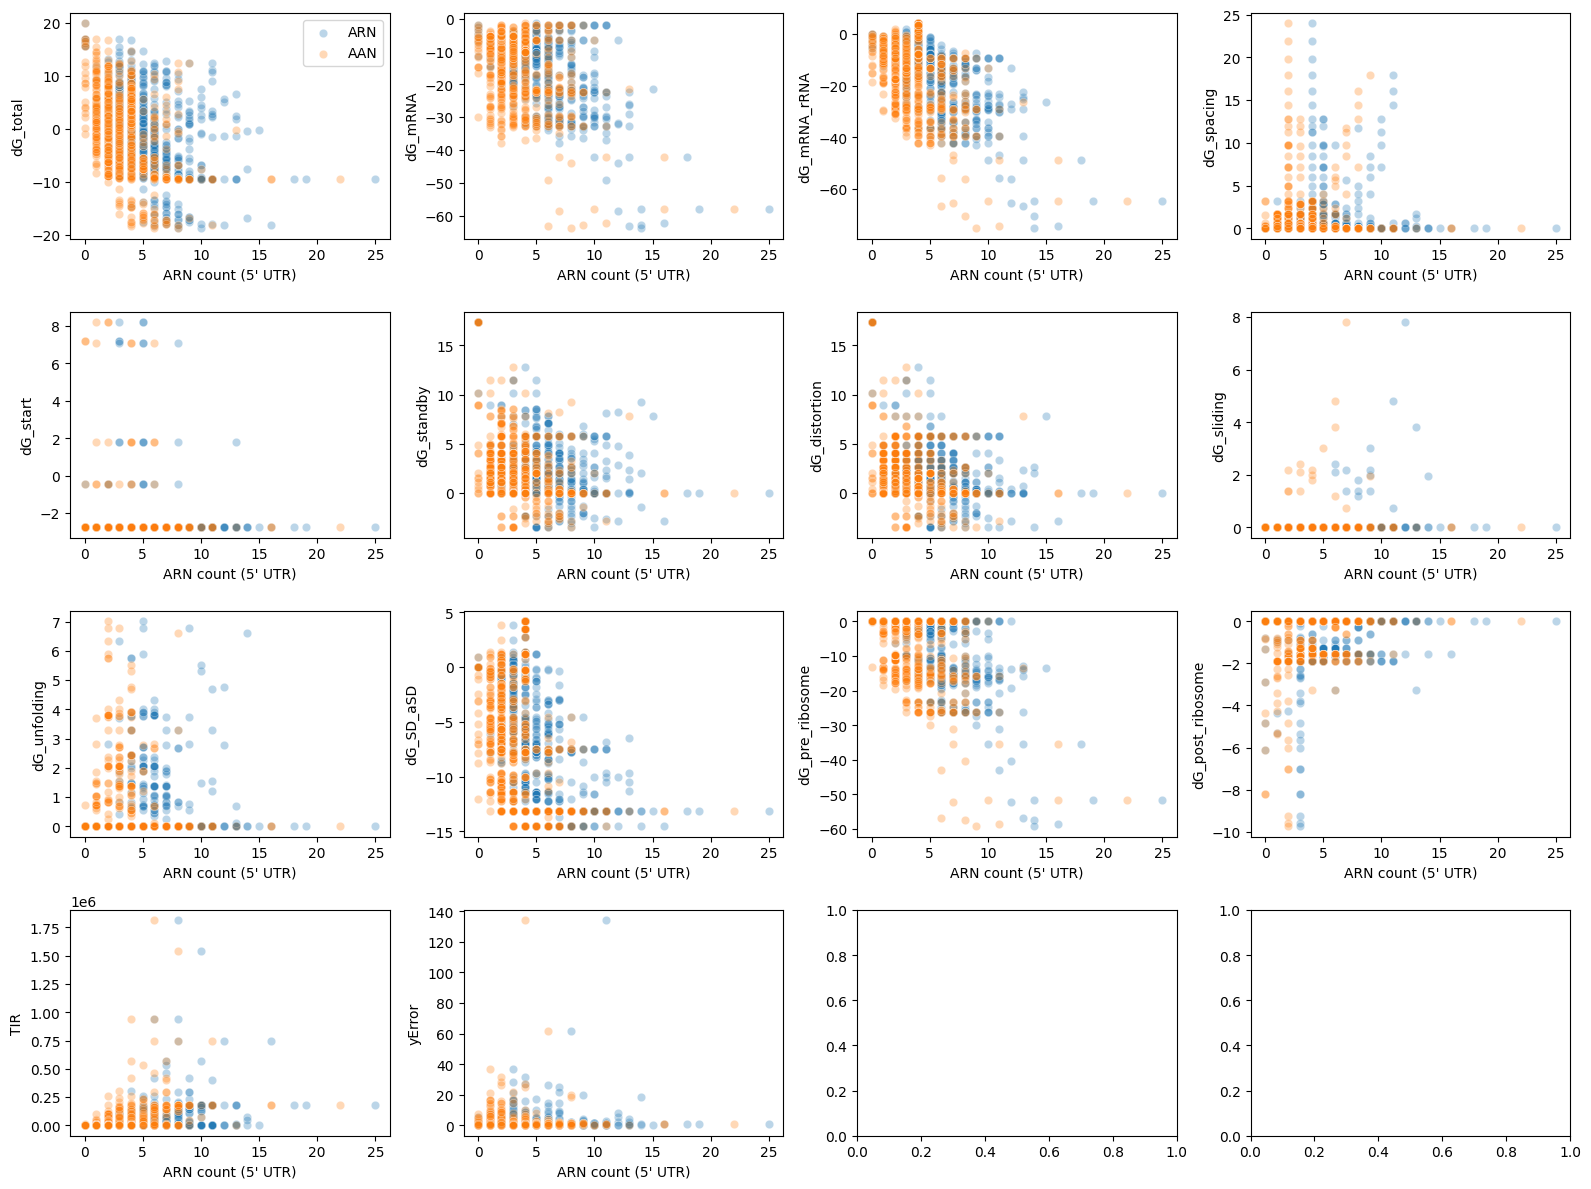

In [29]:
cols_dg = [col for col in df.columns if col.startswith('dG')] + [
    'TIR', 'yError']
nrows = int(np.ceil(np.sqrt(len(cols_dg))))
ncols = int(np.ceil(len(cols_dg) / nrows))
fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
for i, col in enumerate(cols_dg):
    sns.scatterplot(df, x="ARN count (5' UTR)", y=col, label='ARN', # palette='coolwarm', 
                    alpha=0.3, ax=axs.flat[i], legend=True if i==0 else False)
    sns.scatterplot(df, x="AAN count (5' UTR)", y=col, label='AAN', # palette='coolwarm', 
                    alpha=0.3, ax=axs.flat[i], legend=True if i==0 else False)
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'RBS_DG_vs_ARN_count.png'), dpi=300)

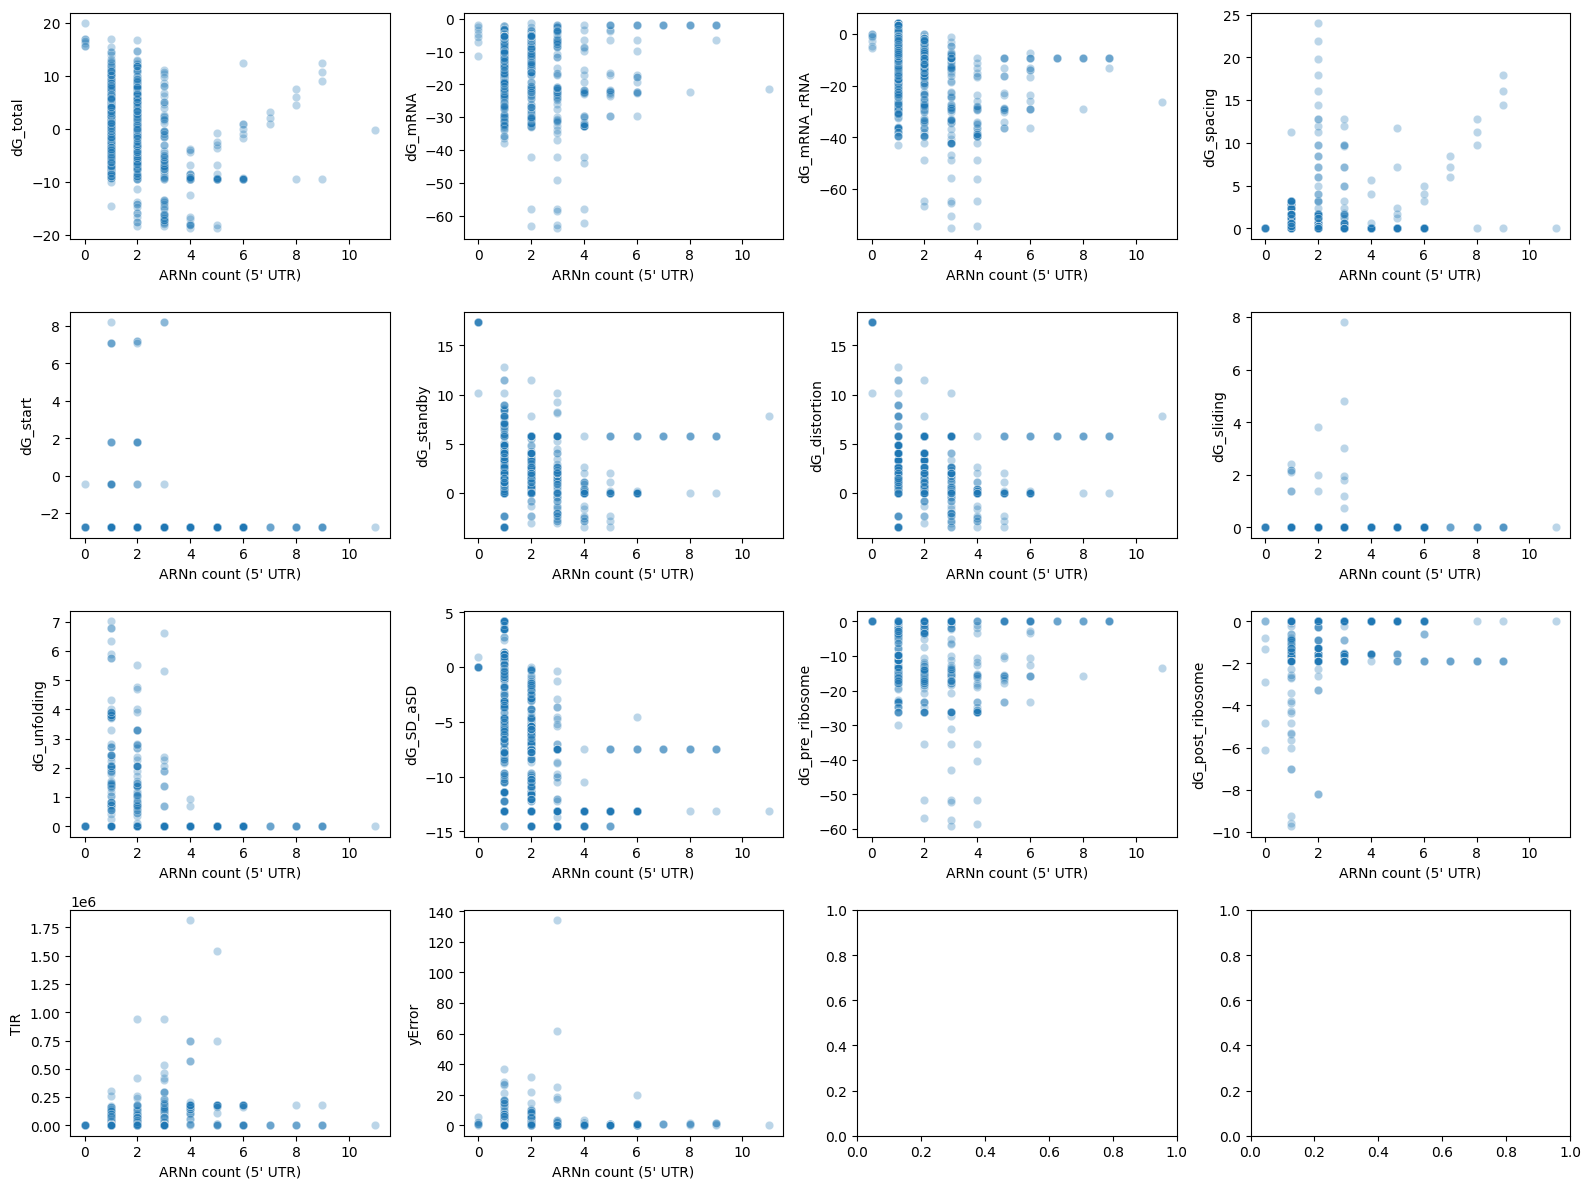

In [ ]:
fig, axs = plt.subplots(nrows, ncols, figsize=(4*ncols, 3*nrows))
for i, col in enumerate(cols_dg):
    sns.scatterplot(df, x="ARNn count (5' UTR)", y=col,
                    alpha=0.3, ax=axs.flat[i], legend=True if i==0 else False)
plt.tight_layout()
plt.savefig(os.path.join(top_dir, 'RBS_DG_vs_ARNn.png'), dpi=300)

<Axes: xlabel='dG_total', ylabel='yError'>

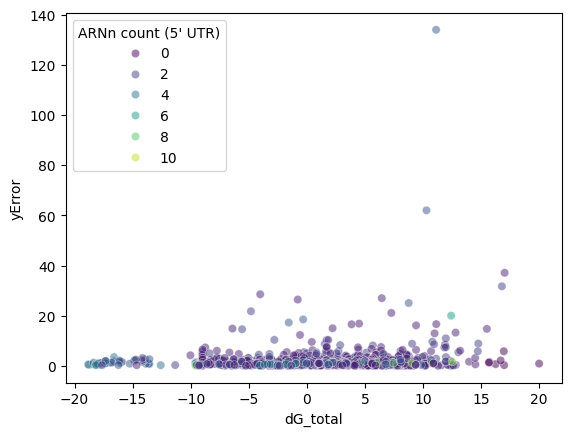

In [39]:
sns.scatterplot(data=df, x="dG_total", y='yError', hue="ARNn count (5' UTR)", palette='viridis', alpha=0.5)